Loading datasets


In [93]:
from sklearn.datasets import load_boston

In [94]:
#return the X and Y data to X and Y variable
X, Y = load_boston(return_X_y = True)

In scikit-learn, all models are objects
Model 
1. create - object
2. learn - .fit(x,y)

In [95]:
import pandas as pd
#first model 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
#import the scaling for the preprocessing 
from sklearn.preprocessing import StandardScaler
#import the pipeline object to chain the preprocessing steps to one another
from sklearn.pipeline import Pipeline
#import the Grid
from sklearn.model_selection import GridSearchCV

In [96]:
#visualisation 
import matplotlib.pylab as plt

In [97]:
mod = KNeighborsRegressor()

In [98]:
mod.fit(X,Y)

KNeighborsRegressor()

In [99]:
mod.predict(X)

array([21.78, 22.9 , 25.36, 26.06, 27.1 , 27.1 , 20.88, 19.1 , 18.4 ,
       19.48, 19.28, 22.  , 24.34, 20.52, 24.66, 21.3 , 30.48, 20.4 ,
       15.7 , 23.54, 16.82, 17.64, 18.3 , 17.08, 16.66, 15.1 , 16.78,
       14.94, 19.94, 18.34, 14.1 , 16.82, 15.12, 14.1 , 15.12, 26.92,
       22.14, 27.4 , 28.44, 31.88, 31.88, 25.36, 25.36, 24.22, 20.68,
       20.44, 20.44, 18.1 , 18.1 , 24.  , 21.54, 24.  , 27.16, 27.16,
       25.7 , 39.82, 27.08, 38.28, 24.8 , 25.64, 21.78, 33.6 , 21.78,
       24.06, 31.74, 25.3 , 26.98, 22.18, 20.42, 20.42, 27.76, 29.5 ,
       27.76, 27.76, 22.92, 21.64, 25.82, 21.64, 21.38, 22.02, 24.8 ,
       21.88, 25.22, 25.64, 25.98, 25.98, 23.28, 25.98, 24.02, 25.58,
       25.58, 25.06, 26.34, 26.04, 30.1 , 24.84, 23.62, 24.32, 28.52,
       24.96, 22.1 , 22.2 , 15.34, 19.74, 19.74, 19.66, 19.56, 21.34,
       19.66, 19.56, 22.08, 20.1 , 19.6 , 17.54, 20.1 , 17.7 , 20.2 ,
       20.1 , 20.66, 19.8 , 22.76, 20.6 , 19.66, 18.52, 19.66, 20.6 ,
       18.52, 16.62,

In [100]:
mod = KNeighborsRegressor().fit(X,Y)
#pipeline object needs a list of tuples
pipe = Pipeline([
    ("scale", StandardScaler()), 
    ("model", KNeighborsRegressor(n_neighbors=1))
])

In [101]:
pipe.fit(X,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

In [102]:
pred = pipe.predict(X)

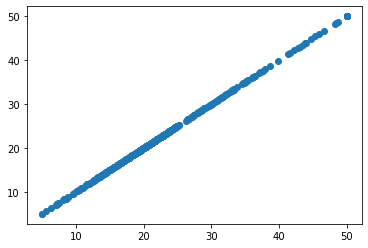

In [103]:
plt.scatter(pred,Y)

IMPORTANT

In [104]:
X, y = load_boston(return_X_y=True)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
#This is in every sckit learn pipeline
#pipe.get_params()

In [105]:
mod = GridSearchCV(estimator=pipe,
                  param_grid= {'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}, #this is to check all the value in the param
                  cv= 3)#cv means cross validation to 3

In [106]:
mod.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [107]:
mod.cv_results_ #keeping track of the numbers

{'mean_fit_time': array([0.00201813, 0.0019838 , 0.00133697, 0.00199421, 0.00200288,
        0.00199636, 0.00199517, 0.00166376, 0.00231624, 0.00200486]),
 'std_fit_time': array([8.21604730e-04, 1.46109075e-05, 4.85082128e-04, 2.38992741e-05,
        1.18497205e-05, 3.17095714e-06, 1.47400196e-06, 4.71091074e-04,
        4.59573359e-04, 1.46674262e-05]),
 'mean_score_time': array([0.00331457, 0.00232983, 0.00331601, 0.00266035, 0.00298882,
        0.00333397, 0.00332467, 0.00332435, 0.00300447, 0.0029974 ]),
 'std_score_time': array([4.78046407e-04, 4.49730039e-04, 4.58166088e-04, 4.68897900e-04,
        8.15273856e-04, 4.83227912e-04, 4.89174670e-04, 4.73000523e-04,
        1.44242693e-05, 1.61245712e-05]),
 'param_model__n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model__n_neighbors': 1},


In [108]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002018,0.000822,0.003315,0.000478,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001984,0.000015,0.002330,0.000450,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001337,0.000485,0.003316,0.000458,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001994,0.000024,0.002660,0.000469,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.002003,0.000012,0.002989,0.000815,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.001996,0.000003,0.003334,0.000483,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001995,0.000001,0.003325,0.000489,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001664,0.000471,0.003324,0.000473,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.002316,0.000460,0.003004,0.000014,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.002005,0.000015,0.002997,0.000016,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4
